In [1100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('canada_edu_optimized.csv')

In [1101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UIS.NIRA.1             44 non-null     float64
 1   UIS.XSPENDP.FDPUB.FNS  44 non-null     float64
 2   BAR.PRM.SCHL           44 non-null     float64
 3   BAR.SEC.SCHL           44 non-null     float64
 4   BAR.TER.SCHL           44 non-null     float64
 5   BAR.TOT.SCHL           44 non-null     float64
 6   BAR.NOED.15UP.ZS       44 non-null     float64
 7   BAR.PRM.CMPT.15UP.ZS   44 non-null     float64
 8   BAR.PRM.ICMP.15UP.ZS   44 non-null     float64
 9   BAR.SEC.CMPT.15UP.ZS   44 non-null     float64
 10  BAR.SEC.ICMP.15UP.ZS   44 non-null     float64
 11  BAR.TER.CMPT.15UP.ZS   44 non-null     float64
 12  BAR.TER.ICMP.15UP.ZS   44 non-null     float64
 13  SE.XPD.TOTL.GB.ZS      44 non-null     float64
 14  SE.XPD.TERT.ZS         44 non-null     float64
 15  NY.GDP.M

In [1102]:
df.describe()

,UIS.NIRA.1,UIS.XSPENDP.FDPUB.FNS,BAR.PRM.SCHL,BAR.SEC.SCHL,BAR.TER.SCHL,BAR.TOT.SCHL,BAR.NOED.15UP.ZS,BAR.PRM.CMPT.15UP.ZS,BAR.PRM.ICMP.15UP.ZS,BAR.SEC.CMPT.15UP.ZS,...,NY.GDP.PCAP.KD,NY.GDP.PCAP.PP.KD,NY.GDP.MKTP.PP.KD,SE.XPD.TOTL.GD.ZS,SL.TLF.ADVN.ZS,SL.TLF.BASC.ZS,SL.TLF.INTM.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SI.POV.GINI
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000
mean,91.107821,69.008087,5.581727,3.841288,0.744576,10.168273,1.021136,6.995682,15.459318,25.651364,...,37539.812575,33814.697070,1.025720e+12,6.200091,76.434416,41.450667,73.339333,1.683840e+07,1.168011,32.593333
std,3.637110,1.576972,0.184761,0.720574,0.284598,1.155726,0.292123,4.430775,8.378616,5.416208,...,7526.561280,4680.539725,2.193605e+11,0.767380,4.450308,3.077076,7.119532,1.220395e+06,0.274236,0.937480
min,88.043053,65.455780,5.327333,2.763333,0.487333,8.596000,0.670000,2.240000,4.790000,17.390000,...,24629.215560,30115.281240,8.513584e+11,4.648700,59.660000,31.830000,65.890999,1.471654e+07,0.796845,31.000000
25%,88.043053,68.887654,5.425333,3.414000,0.563333,9.528667,0.830000,3.580000,9.280000,20.300000,...,31537.862350,30115.281240,8.588757e+11,5.882095,76.434416,41.450667,70.176250,1.642797e+07,0.987189,31.637500
50%,90.228756,68.887654,5.618667,3.785333,0.670667,9.968667,0.880000,5.370000,13.490000,27.250000,...,36640.512995,30399.403200,8.643622e+11,6.200091,76.434416,41.450667,73.339333,1.683840e+07,1.088265,32.593333
75%,91.107821,68.887654,5.720000,4.227333,0.754667,10.704000,1.080000,8.790000,19.110000,30.190000,...,44972.824147,38576.655588,1.212887e+12,6.708625,78.457499,41.927751,73.339333,1.704893e+07,1.297876,33.500000
max,99.719414,74.186705,5.857333,5.083333,1.342000,12.282667,1.590000,16.820000,31.970000,32.110000,...,49355.096640,42335.668280,1.488330e+12,7.710190,81.457001,49.676998,98.529999,1.950646e+07,1.891678,33.800000


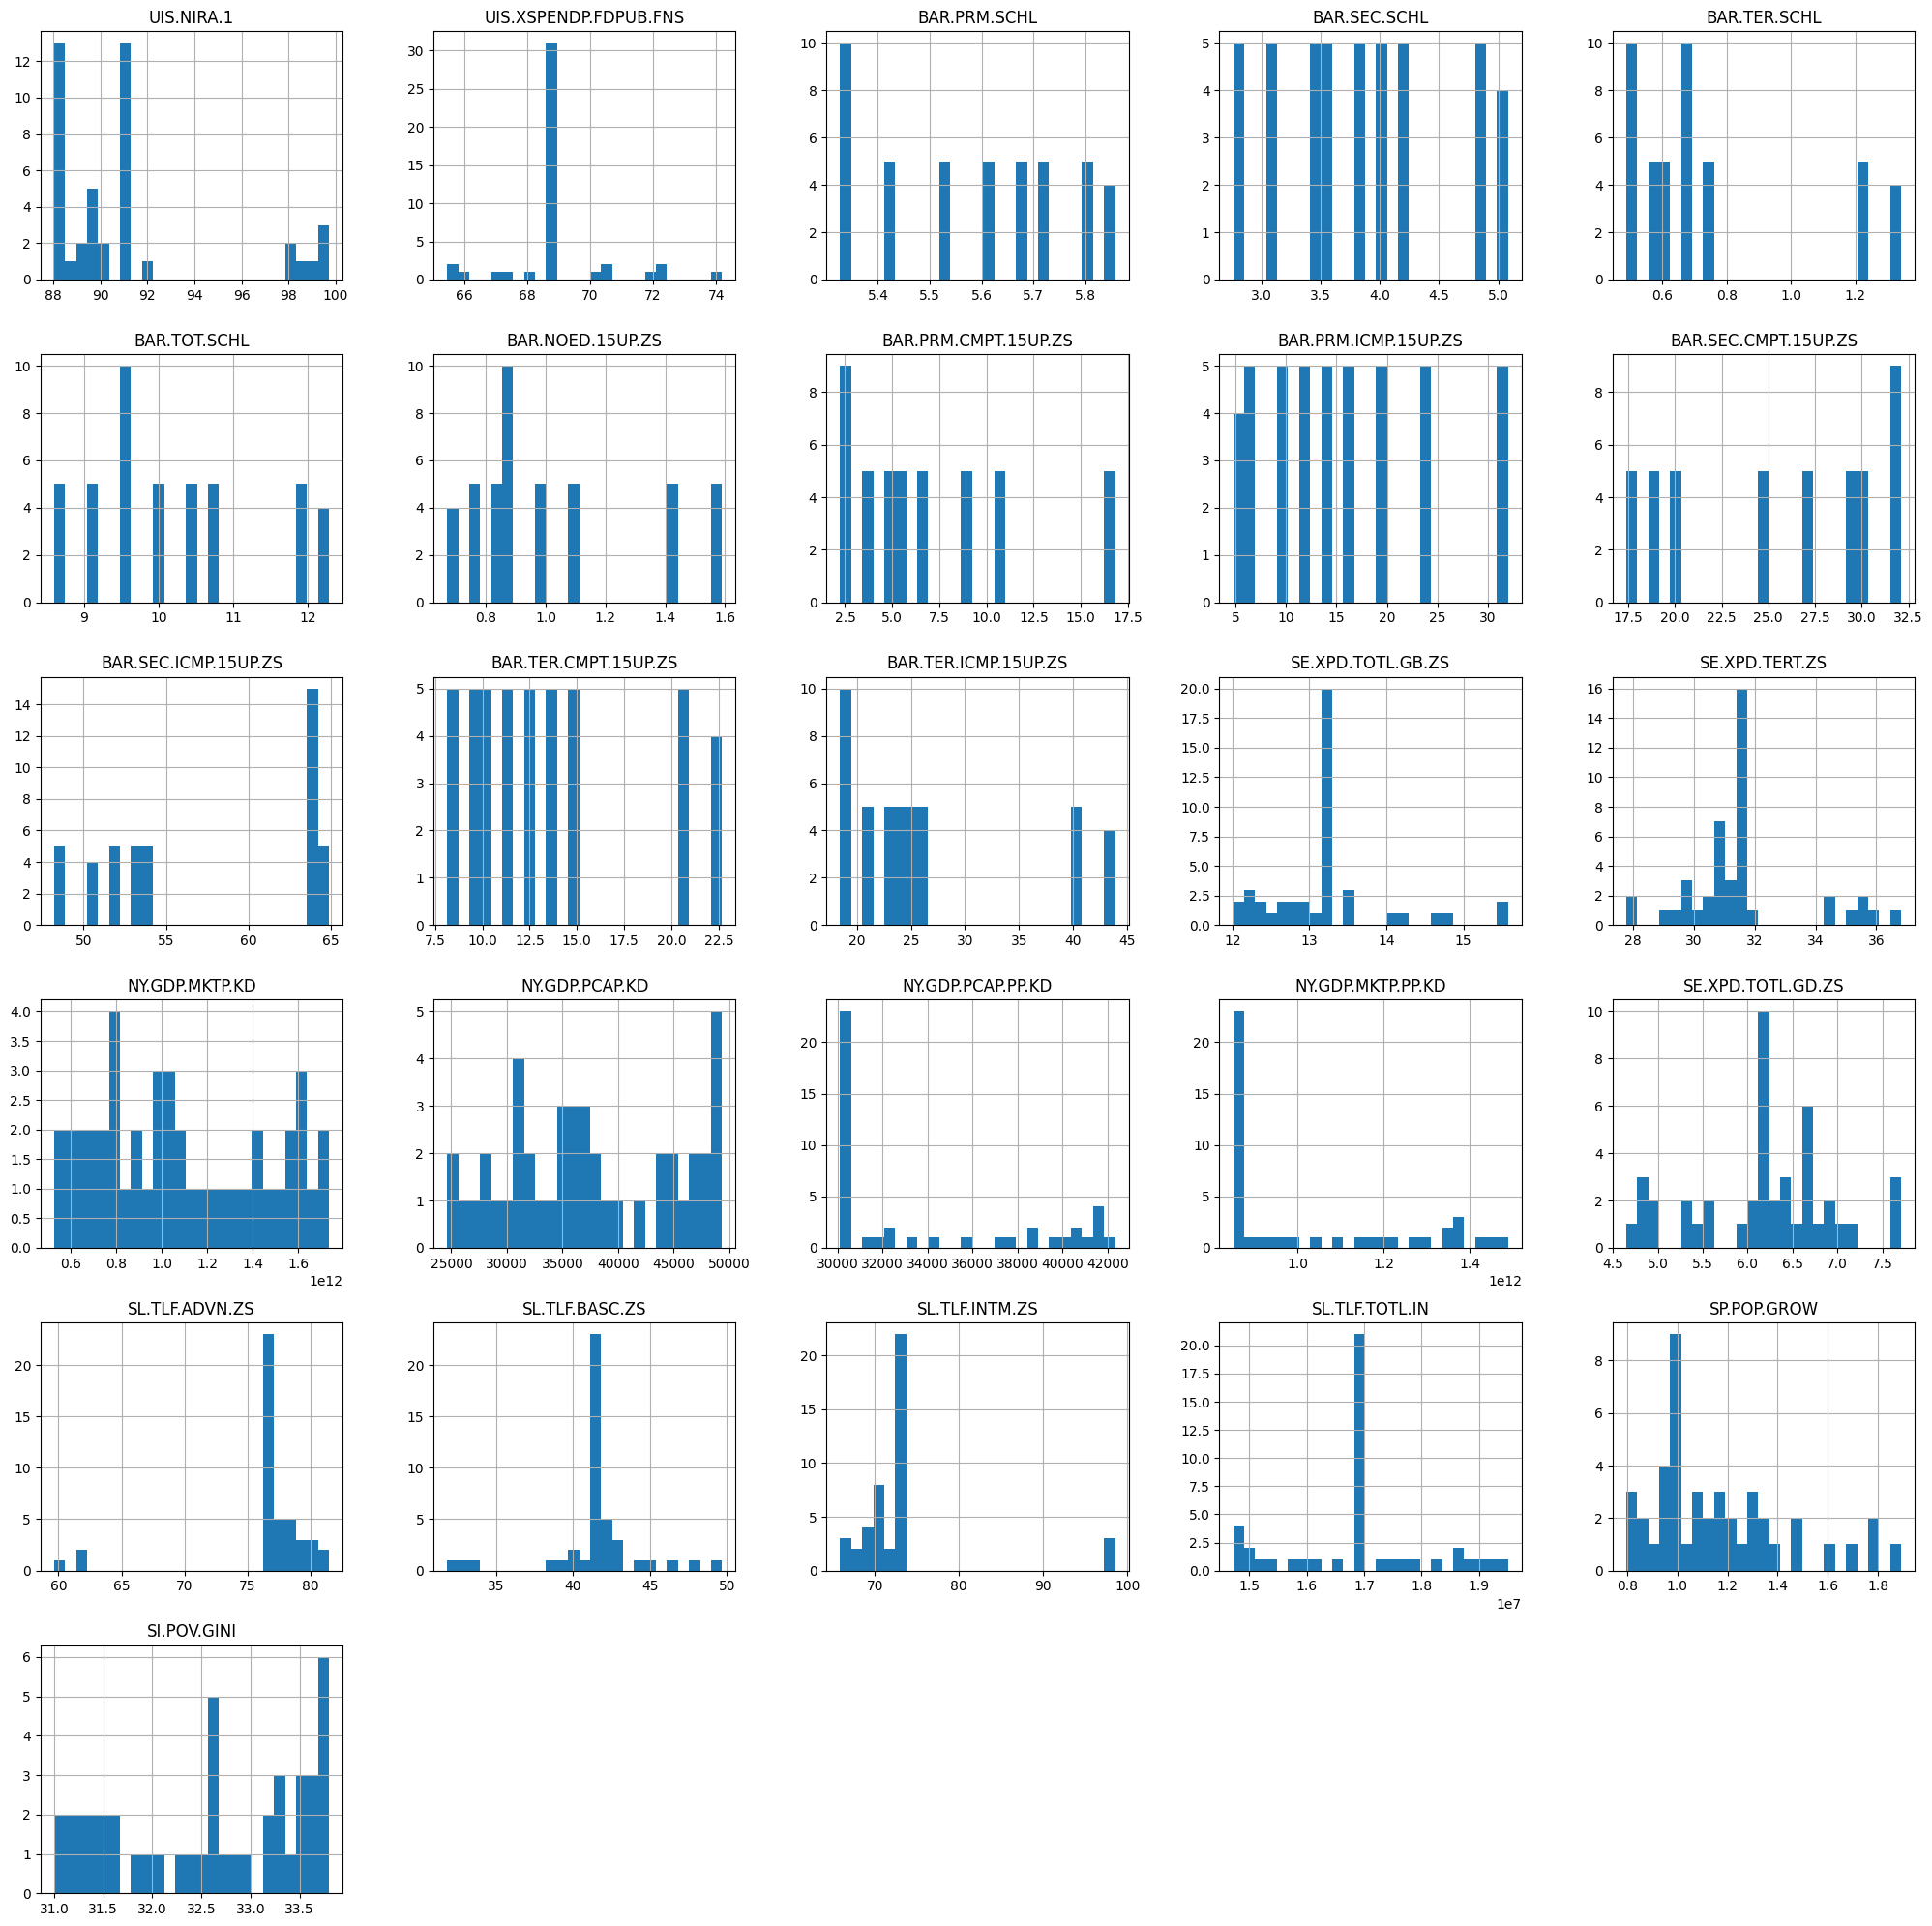

In [1103]:
df.hist(bins=25, figsize=(25, 25))
plt.show()

In [1104]:
from sklearn.model_selection import train_test_split


y = df['SI.POV.GINI']
X = df.drop('SI.POV.GINI', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1105]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1106]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [1107]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, HalvingRandomSearchCV, RandomizedSearchCV

svr_rmse = -cross_val_score(svr, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(svr_rmse).describe()

count    10.000000
mean      0.291024
std       0.155108
min       0.111188
25%       0.164511
50%       0.267072
75%       0.378209
max       0.576367
dtype: float64

In [1108]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [1109]:
lin_rmse = -cross_val_score(lin_reg, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(lin_rmse).describe()

count    10.000000
mean      1.345267
std       1.659098
min       0.243026
25%       0.456398
50%       0.610744
75%       1.482040
max       5.429533
dtype: float64

In [1110]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10)

In [1111]:
rfr_rmses = -cross_val_score(rfr, X_train_scaled, y_train, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(rfr_rmses).describe()

count    10.000000
mean      0.450124
std       0.275509
min       0.069337
25%       0.219769
50%       0.518330
75%       0.627611
max       0.820691
dtype: float64

In [1112]:
hyperparameters = {
  'kernel': ['poly', 'rbf', 'linear'], 
  'degree': list(range(1,10)),
  'gamma': ['auto', 'scale']
}

svr_search = RandomizedSearchCV(svr, hyperparameters, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=-1)
svr_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['poly', 'rbf', 'linear']},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [1113]:
svr_search.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 7}

In [1114]:
final_svr = svr_search.best_estimator_

In [1115]:
cv_res_svr_search = pd.DataFrame(svr_search.cv_results_)
cv_res_svr_search.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res_svr_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.000303,0.000078,0.000143,0.000026,rbf,auto,7,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 7}",-0.403020,-0.137782,...,-0.133065,-0.128102,-0.136486,-0.130465,-0.141458,-0.111773,-0.108991,-0.142457,-0.129847,0.010650
7,0.000251,0.000102,0.000110,0.000012,rbf,auto,2,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}",-0.403020,-0.137782,...,-0.133065,-0.128102,-0.136486,-0.130465,-0.141458,-0.111773,-0.108991,-0.142457,-0.129847,0.010650
1,0.000340,0.000081,0.000143,0.000025,rbf,scale,5,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': 5}",-0.401191,-0.138017,...,-0.126805,-0.133312,-0.132128,-0.120474,-0.147019,-0.115083,-0.109093,-0.150965,-0.129862,0.012297
6,0.000502,0.000105,0.000123,0.000018,linear,auto,5,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",-0.354284,-0.203644,...,-0.121421,-0.128062,-0.109606,-0.133025,-0.135977,-0.138752,-0.143666,-0.122064,-0.129970,0.009965
3,0.000311,0.000070,0.000132,0.000027,poly,auto,4,"{'kernel': 'poly', 'gamma': 'auto', 'degree': 4}",-0.682367,-0.543016,...,-0.394756,-0.437957,-0.434017,-0.400976,-0.395654,-0.392356,-0.354476,-0.436497,-0.404465,0.024738


In [1116]:
hyperparameters = {
  'max_depth': list(range(6, 22)),
  'max_features': list(range(4, 12)),
  'n_estimators': list(range(1, 50))
}

wine_rfr_search = RandomizedSearchCV(rfr, hyperparameters, cv=10, n_iter=20, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=-1)
wine_rfr_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21],
                                        'max_features': [4, 5, 6, 7, 8, 9, 10,
                                                         11],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [1117]:
wine_rfr_search.best_params_

{'n_estimators': 6, 'max_features': 8, 'max_depth': 14}

In [1118]:
wine_final_rfr = wine_rfr_search.best_estimator_

In [1119]:
from sklearn.metrics import mean_squared_error
from scipy import stats

final_preds_svr = final_svr.predict(X_test_scaled)

final_rmse_svr = mean_squared_error(y_test, final_preds_svr, squared=False)
final_mse_svr = mean_squared_error(y_test, final_preds_svr, squared=True)

print("RMSE:", final_rmse_svr)
print("MSE:", final_mse_svr)

RMSE: 0.2496716547787493
MSE: 0.06233593519995897


In [1120]:
final_preds_rfr = wine_final_rfr.predict(X_test_scaled)

final_rmse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=False)
final_mse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=True)

squared_errors = (final_preds_rfr - y_test) ** 2

print("RMSE:", final_rmse_rfr)
print("MSE:", final_mse_rfr)

RMSE: 0.2872858165259152
MSE: 0.08253314037696183


In [1121]:
final_svr.predict(
    np.array(
        [88.04305267,68.88765423,5.334666667,2.763333333,0.4993333333,8.596,1.08,16.82,31.97,17.39,48.21,9.66,18.74,13.22047428,31.59305006,525193392688,24629.21556,30115.28124,858875684380,6.200091389,76.43441598,41.45066667,73.33933258,16838398.58,1.397831]).reshape(1, -1))

array([32.83904803])